# Summary

### ***<u>Code to be checked!!!</u>***

Apparently in this notebook we tried to somehow characterize the units with the drift...


---

In [3]:
import sys
sys.path.append("C:\ZSOMBI\OneDrive\PoPy")
sys.path.append("/Users/zsombi/OneDrive/PoPy")

import numpy as np
import matplotlib.pyplot as plt

from popy.io_tools import load_behavior, load_metadata
from popy.behavior_data_tools import *
from popy.neural_data_tools import time_normalize_session, scale_neural_data, remove_low_fr_neurons, remove_trunctuated_neurons, remove_drift_neurons
from popy.io_tools import load_neural_data
from popy.decoding.population_decoders import build_dataset
#from popy.decoders import preproc_data
from popy.plotting.plotting_tools import plot_keypoints

In [4]:
monkey, session = 'ka', '210322'

# Load data

## Load behavioral data

In [5]:
# Load session data, and select only the trials of the given monkey and session
session_data = load_behavior(monkey, session)
#session_data = drop_time_fields(session_data)
#session_data = add_value_function(session_data, monkey=monkey)
#session_data = session_data_pooled[(session_data_pooled['monkey'] == monkey) & (session_data_pooled['session'] == session)]

In [6]:
session_data

,monkey,session,trial_id,trial_start_time,lever_touch_time,lever_validation_time,lever_release_time,target_touch_time,target_validation_time,feedback_time,trial_end_time,block_id,best_target,target,feedback
16734,ka,210322,0,9.7919,51.9560,52.9768,53.4187,54.5254,55.0988,55.6184,59.6561,0,1,2.0,False
16735,ka,210322,1,59.6561,59.7454,60.7601,61.2780,61.8468,62.3944,62.9092,67.6624,0,1,3.0,False
16736,ka,210322,2,67.6624,68.2720,69.2893,69.8931,70.4462,70.9757,71.4914,76.0635,0,1,1.0,True
16737,ka,210322,3,76.0635,78.3176,79.3384,79.7376,80.0704,80.6119,81.1261,85.1502,0,1,1.0,False
16738,ka,210322,4,85.1502,85.9045,86.9218,87.2708,87.6534,88.1539,88.6702,92.9438,0,1,3.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17154,ka,210322,420,3238.6717,3243.4172,3244.4297,3244.5638,3246.1735,3246.6890,3247.2010,3251.2281,9,3,3.0,True
17155,ka,210322,421,3251.2281,3251.2949,3252.3183,3252.7113,3252.9564,3253.4860,3253.9991,3258.3208,9,3,3.0,False
17156,ka,210322,422,3258.3208,3258.5950,3259.6093,3259.8254,3260.0612,3260.6344,3261.1424,3265.1677,9,3,3.0,False
17157,ka,210322,423,3265.1677,3265.2610,3266.2756,3266.3684,3266.7138,3267.2552,3267.7703,3271.7916,9,3,3.0,False


## Load neuarl data

In [7]:
neural_data = load_neural_data(monkey, session, 'spikes')
# remove trunctuated units
#neural_data = remove_trunctuated_neurons(neural_data, delay_limit=1)
# remove low_firing units
#neural_data = remove_low_fr_neurons(neural_data, 1)
#neural_data = remove_drift_neurons(neural_data, 0.1)

# normalize neural data in time
#neural_data = time_normalize_session(neural_data)

# scale neural data
#neural_data = scale_neural_data(neural_data)

In [8]:
neural_data

<xarray.DataArray (unit: 47, time: 327361)>
[15385967 values with dtype=int8]
Coordinates:
  * time              (time) float64 7.79 7.8 7.81 ... 3.281e+03 3.281e+03
    trial_id          (time) float64 ...
    epoch_id          (time) float64 ...
  * unit              (unit) object 'LPFC_03_03' 'LPFC_03_01' ... 'MCC_16_01'
    area              (unit) object ...
    unit_id_original  (unit) int32 ...
    channel           (unit) int32 ...
Attributes:
    bin_size:  <xarray.DataArray 'time' ()>\narray(0.01)\nCoordinates:\n    t...

# Correlations

/Users/zsombi/Library/CloudStorage/OneDrive-Personal/PoPy/envs/popy/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/zsombi/Library/CloudStorage/OneDrive-Personal/PoPy/envs/popy/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


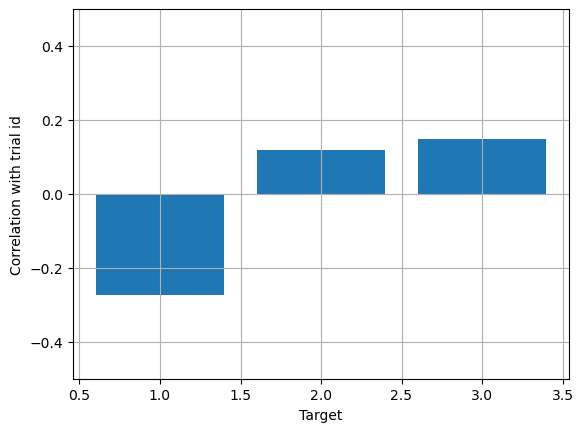

In [10]:
# correlate each target slection to time (trial id)
trial_id_vector = session_data.trial_id.values

corrs_target = [np.corrcoef(trial_id_vector, session_data.target.values == i)[0, 1] for i in np.unique(trial_id_vector)]

plt.bar(np.unique(trial_id_vector), corrs_target)
plt.xlabel('Target')
plt.ylabel('Correlation with trial id')
plt.ylim([-.5, .5])
plt.grid()

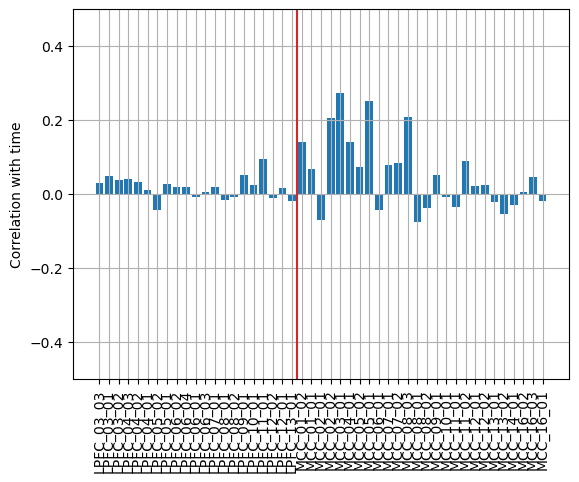

In [11]:
# correlate each unit activity with time
time_vector = neural_data.time
unit_activity = neural_data.data

corrs_units = np.array([np.corrcoef(time_vector, unit_activity[i, :])[0, 1] for i in range(unit_activity.shape[0])])

plt.bar(range(len(corrs_units)), corrs_units)
plt.ylabel('Correlation with time')
xticklabels = neural_data.unit.data
plt.xticks(range(len(corrs_units)), xticklabels, rotation=90)
# how many of xticks start with 'LPFC'
plt.axvline(sum([xticklabels[i].startswith('LPFC') for i in range(len(xticklabels))])-.5, color='tab:red')
plt.ylim([-.5, .5])
plt.grid()
plt.show()

# Decoding

In [12]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, StratifiedKFold, permutation_test_score

## Prepare things

### Prepare data

In [13]:
# behav data
area = 'both'

# Add phase information to the session data
session_data = add_phase_info(session_data, transition_limit=0, exploration_limit=5)

data_to_use = 'all_trials'

if data_to_use == 'search_trials_only':
    session_data_decoder = session_data[session_data['phase'] == 'search']
elif data_to_use == 'all_trials':
    session_data_decoder = session_data

print(f'Removed {len(session_data) - len(session_data_decoder)}/{len(session_data)} trials')

Removed 0/425 trials


In [14]:
# neural data
# remove drif units

units_to_use = 'no_drift_units'

if units_to_use == 'all_units':
    valid_units = np.ones(len(corrs_units), dtype=bool)
elif units_to_use == 'no_drift_units':
    correlation_threshold = .2
    valid_units = np.abs(np.array(corrs_units)) < correlation_threshold
    
neural_data_decoder = neural_data[valid_units, :]

print(f'Removed {sum(~valid_units)}/{len(valid_units)} units')

Removed 4/47 units


In [15]:
# 1. preprocess data, create labelled dataset
X, y = preproc_data(neural_data_decoder, session_data_decoder,
                    area=area, target_name='target',
                    do_balance_dataset=True)
# use only half of the data (as the function abouve returns a 2-trial long dataset)
X = X[:, :, :int(X.shape[2] / 2)]

print(X.shape, y.shape)
print(f'y == 0: {np.sum(y == 0)}, y == 1: {np.sum(y == 1)}, y == 2: {np.sum(y == 2)}')

NameError: name 'preproc_data' is not defined

### Prepare time-resolved parameters

In [ ]:
# 2. run decoder on the labelled dataset
bin_size = neural_data.attrs['bin_size']  # in seconds

# init time related variables
T = X.shape[2]  # time axis length
step_len = .10  # in seconds
step_bins = int(np.round(step_len / bin_size, 5))
t_max = T // step_bins * step_bins # max time index o decode, divisible by SKIPPING
n_bins = t_max // step_bins  # number of time points to decode

### Prepare decoder

In [ ]:
# init decoder
cv = 5
kf = StratifiedKFold(n_splits=cv, shuffle=True)
decoder = LogisticRegression(multi_class='ovr', penalty='l2', solver='liblinear', C=1)
scoring_function = 'accuracy'
n_permutations = 30

## Run decoder w. CV    

In [ ]:
scores = np.zeros(n_bins)

weights_tt = []
weights_it = []

# time resolved decoding
for i_train, t_train in enumerate(np.arange(0, t_max, step_bins)):
    X_temp = X[:, :, t_train]
    y_temp = y

    # run cross-validation
    #scores[i_train] = decoder.fit(X_temp, y_temp).score(X_temp, y_temp)
    scores[i_train] = cross_val_score(decoder, X_temp, y_temp, cv=cv).mean()

    # save weights of target touch and inter-trial period
    if i_train == 2.5 * (1/step_len):  # at 2.5 seconds is the target touch event
        weights_tt = decoder.fit(X_temp, y_temp).coef_
    if i_train == 0:  # at 0 seconds is the inter-trial period
        weights_it = decoder.fit(X_temp, y_temp).coef_ 

weights_tt = np.array(weights_tt)
weights_it = np.array(weights_it)

### Plot decoding results

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, 'Decoding target: ka 190821\n both area; all_trials; no_drift_units')

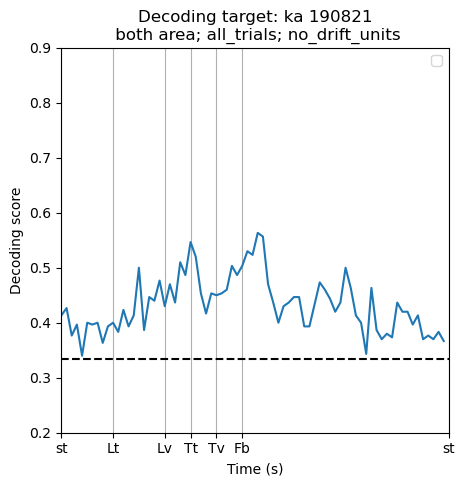

In [ ]:
# plot decoding scores

time_vector = np.arange(0, t_max, step_bins) * bin_size

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(time_vector, scores)
plot_keypoints(ax)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Decoding score')
ax.set_ylim([0.2, .9])
ax.axhline(1/3, color='k', linestyle='--')
ax.legend()
ax.grid(axis='x')
ax.set_xlim([0, 7.5])



ax.set_title(f'Decoding target: {monkey} {session}\n {area} area; {data_to_use}; {units_to_use}')

### Plot weights

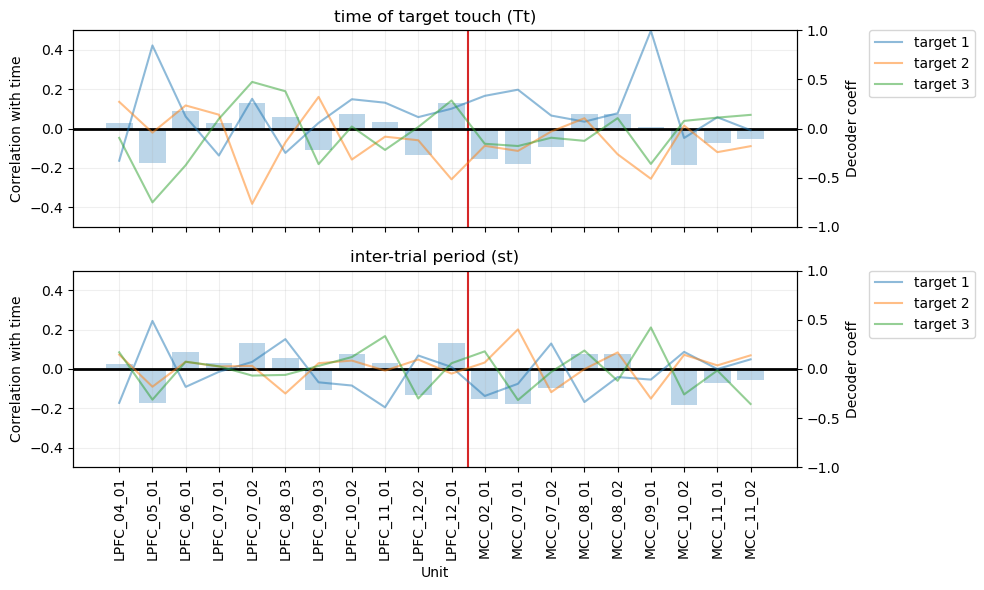

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
plt.xlabel('Unit')
plt.xticks(np.arange(len(corrs_units[valid_units])), xticklabels[valid_units], rotation=90)

# plot weights for both phases
for ax in axs:
    ax.bar(np.arange(len(corrs_units[valid_units])), corrs_units[valid_units], alpha=.3)
    ax.set_ylabel('Correlation with time')
    ax.set_ylim([-.5, .5])

    ax.axvline(sum([ xticklabels[valid_units][i].startswith('LPFC') for i in range(len( xticklabels[valid_units]))])-.5, color='tab:red')
    ax.grid(alpha=.2)

    ax.axhline(0, color='k', linewidth=2)


ax = axs[0]
ax.set_title(f'time of target touch (Tt)')
ax_ = ax.twinx()
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_tt[0, :], label='target 1', alpha=.5)
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_tt[1, :], label='target 2', alpha=.5)
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_tt[2, :], label='target 3', alpha=.5)
ax_.set_ylabel('Decoder coeff')
# y range around 0
ax_.set_ylim([-1, 1])
ax_.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

ax = axs[1]
ax.set_title(f'inter-trial period (st)')
ax_ = ax.twinx()
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_it[0, :], label='target 1', alpha=.5)
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_it[1, :], label='target 2', alpha=.5)
ax_.plot(np.arange(len(corrs_units[valid_units])), weights_it[2, :], label='target 3', alpha=.5)
ax_.set_ylabel('Decoder coeff')
# y range around 0
ax_.set_ylim([-1, 1])
ax_.legend(bbox_to_anchor=(1.1, 1), loc='upper left', borderaxespad=0.)

plt.tight_layout()

## Run decoder w. permutation test

In [ ]:
import tqdm

scores = np.zeros(n_bins)
perm_scores = np.zeros((n_permutations, n_bins))
pvalues = np.zeros(n_bins)

# init bar
bar = tqdm.tqdm(total=n_bins)
# time resolved decoding
for i_train, t_train in enumerate(np.arange(0, t_max, step_bins)):
    bar.update(1)
    X_temp = X[:, :, t_train]
    y_temp = y

    # run permutation test
    scores[i_train], perm_scores[:, i_train], pvalues[i_train] = permutation_test_score(
        decoder, X_temp, y_temp, cv=cv, n_permutations=n_permutations)


100%|██████████| 75/75 [41:47:55<00:00, 2006.34s/it]








































































### Plot decoding results

Text(0.5, 1.0, 'Decoding target: ka 190821\n both area; all_trials; no_drift_units')

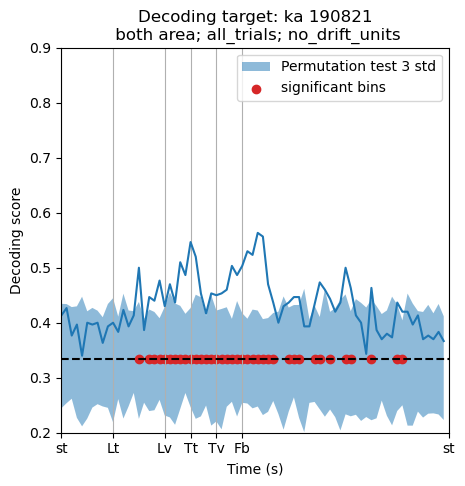

In [ ]:
# plot decoding scores

time_vector = np.arange(0, t_max, step_bins) * bin_size

fig, ax = plt.subplots(figsize=(5, 5))

ax.plot(time_vector, scores)
n_std = 3
ax.fill_between(time_vector, perm_scores.mean(0) - n_std * perm_scores.std(axis=0), perm_scores.mean(0) + n_std * perm_scores.std(axis=0), alpha=.5, label=f'Permutation test {n_std} std')

# mark when the decoding score is significant 
significant_times = time_vector[perm_scores.mean(0) + n_std * perm_scores.std(axis=0) < scores]
ax.scatter(significant_times, np.ones(len(significant_times)) * 1/3, marker='o', color='tab:red', label='significant bins')

plot_keypoints(ax)

ax.set_xlabel('Time (s)')
ax.set_ylabel('Decoding score')
ax.set_ylim([0.2, .9])
ax.set_xlim([0, 7.5])
ax.axhline(1/3, color='k', linestyle='--')
ax.legend()
ax.grid(axis='x')

ax.set_title(f'Decoding target: {monkey} {session}\n {area} area; {data_to_use}; {units_to_use}')